### Importing Libraries

In [1]:
# Importing Libraries

## Data libraries
import numpy as np
import pandas as pd

## Visulaisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Model building related libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')


### Reading data

In [3]:
lead_df = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', 200)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## EDA

### Data Understanding

In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- As we can see that there are only 7 numerical columns and remaining 30 columns are categorical columns.

In [6]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- From above the columns namely 'TotalVisits', 'Total Time Spent on Website' & 'Page Views Per Visit' are having outliers, so we need to treat them.

## Data Cleaning

In [7]:
# Removing the unnecessary columns

redun_col = ['Prospect ID', 'Lead Number', 'Country', 'I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview', 'City']

lead_dr_df = lead_df.drop(redun_col, axis=1)

In [8]:
# Checking the dataset

lead_dr_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


In [9]:
lead_dr_df.shape

(9240, 31)

In [10]:
lead_dr_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Last Notable Activity'],
      dtype='object')

In [11]:
lead_dr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

In [12]:
## Checking value counts in categorical

for col in lead_dr_df.columns:
    if lead_dr_df[col].dtype == 'object':
        # print the value counts for the column
        print(lead_dr_df[col].value_counts())
        print('*'*40)
    

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
****************************************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
****************************************
No     8506
Yes     734
Name: Do Not Email, dtype: int64
****************************************
No     9238
Yes       2
Name: Do Not Call, dtype: 

- From above we observe that there are some columns with labels 'Select', which means that the customer didn't select any of the given options, hence lets treat them as null values. 

In [13]:
# Now replacing label 'Select' with Null values

lead_dr_df.Specialization = lead_dr_df.Specialization.replace('Select',None)
lead_dr_df['How did you hear about X Education'] = lead_dr_df['How did you hear about X Education'].replace('Select',None)
lead_dr_df['Lead Profile'] = lead_dr_df['Lead Profile'].replace('Select',None)


In [14]:
lead_dr_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [15]:
lead_dr_df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [16]:
lead_dr_df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
# Checking the null values

round(100*lead_dr_df.isnull().sum()/len(lead_dr_df),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Dropping the columns having more than 35% of the null values

In [18]:
# Dropping the columns having more than 35% of the null values

lead_dr_df = lead_dr_df.dropna(thresh=len(lead_dr_df) * 0.65, axis=1)

In [19]:
# Checking the null values

round(100*lead_dr_df.isnull().sum()/len(lead_dr_df),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [20]:
# Checking the shape

lead_dr_df.shape

(9240, 22)

#### Checking columns which are having less than 35% of null values

In [21]:
# Checking the Lead Source col.

lead_dr_df['Lead Source'].value_counts().head()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

- Since 'Google' is the mode, lets impute the null values with 'Google'.

In [22]:
# Checking the Total Visits col.

lead_dr_df['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

- Since the most occuring value here is '0.0', therefore imputing the missing values with '0.0'.

In [23]:
# Checking the Page Views Per Visit col.

lead_dr_df['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

- Lets impute null with mode

In [24]:
# Checking the Last Activity col.

lead_dr_df['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

- Since the most occuring value here is 'Email Opened', therefore imputing the missing values with 'Email Opened'.

In [25]:
# Checking the What is your current occupation  col.

lead_dr_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- Since the most occuring value here is 'Unemployed', therefore imputing the missing values with 'Unemployed'.

In [26]:
# Checking the What matters most to you in choosing a course col.

lead_dr_df['What matters most to you in choosing a course'].value_counts().head()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Since the most occuring value here is 'Better Career Prospects', therefore imputing the missing values with 'Better Career Prospects'.

In [27]:
# Now imputing the missing values as per their respective values.

missing_val = {'Lead Source':'Google', 'TotalVisits':'0.0', 'Page Views Per Visit':'0.0', 'Last Activity':'Email Opened',
              'What is your current occupation':'Unemployed', 
               'What matters most to you in choosing a course':'Better Career Prospects'}

lead_dr_df = lead_dr_df.fillna(value = missing_val)


In [28]:
# Checking the null values once more

lead_dr_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

#### Now there are no null values present in the dataset.

**Above we saw that lead source column has redundant value for Google, so lets correct it**

In [29]:
# Checking the Lead Source column for redundant values

lead_dr_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- We found that the '__Google__' is being misprinted as '__google__' which is making a duplicate in our data and can harm our analysis.
- We need to treat it to make it same as '__Google__'.

In [30]:
# Treating the misprinted word

lead_dr_df['Lead Source'] = lead_dr_df['Lead Source'].apply(lambda x:x.capitalize())
lead_dr_df['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: Lead Source, dtype: int64

Now the dataset is good for the further analysis as all the values.

## Data Transformation

- Now lets convert the yes/no columns to numerical

In [31]:
# Yes : 1
# No : 0

category = {'Yes':1, 'No':0}

bi_categ_cols = ['Do Not Email','Do Not Call','Magazine','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content']

for col in bi_categ_cols:
    lead_dr_df[col] = lead_dr_df[col].map(category)



In [32]:
lead_dr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

**Page Views Per Visit and TotalVisits have numerical data, so lets convert it into numeric**

In [33]:
lead_dr_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [34]:
lead_dr_df.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
0.0       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [35]:
# converting Page Views Per Visit and TotalVisits to float

lead_dr_df['Page Views Per Visit'] = lead_dr_df['Page Views Per Visit'].astype(float)
lead_dr_df['TotalVisits'] = lead_dr_df['TotalVisits'].astype(float)

- After converting the binary categories from 'Yes' to 1 & 'No' to 0 and correcting datatype of Page Views Per Visit and TotalVisits we will now create __dummy variables__.

In [36]:
# Creating dummy variables for the 8 categories and dropping the first level

dummy = pd.get_dummies(lead_dr_df[['Lead Origin','Lead Source','Last Activity' 
                                   ,'What is your current occupation', 'What matters most to you in choosing a course',
                                   'Last Notable Activity']], drop_first=True)

# Adding the dummies to the original dataset

lead_dr_df = pd.concat([lead_dr_df,dummy], axis=1)


In [37]:
lead_dr_df.shape

(9240, 83)

In [38]:
lead_dr_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


- Now removing the __Duplicate columns__

In [39]:
# We have created a dummies for the below categories hence removing the original column.

dup = ['Lead Origin','Lead Source','Last Activity' ,'What is your current occupation', 
       'What matters most to you in choosing a course','Last Notable Activity']

lead_dr_df = lead_dr_df.drop(dup, axis=1)
lead_dr_df.shape

(9240, 77)

In [40]:
# Removing redundant columns from the dataset

redun = ['Receive More Updates About Our Courses','Update me on Supply Chain Content',
         'Get updates on DM Content','Magazine']

lead_dr_df = lead_dr_df.drop(redun, axis=1)

In [41]:
lead_dr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

**Now the datatype of all the columns is numeric**

## Checking for Outliers

In [42]:
round(lead_dr_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95,0.99]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.0,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,0.00,0.00,0.53,0.08,0.01,0.00,0.00,0.00,0.28,0.01,0.31,0.00,0.00,0.19,0.12,0.00,0.00,0.06,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.05,0.04,0.03,0.00,0.38,0.00,0.01,0.00,0.11,0.07,0.00,0.30,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.9,0.08,0.00,0.00,0.01,0.02,0.00,0.31,0.00,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,0.02,0.03,0.50,0.27,0.08,0.01,0.01,0.02,0.45,0.08,0.46,0.01,0.01,0.39,0.33,0.01,0.01,0.23,0.12,0.01,0.01,0.01,0.01,0.12,0.01,0.21,0.18,0.17,0.01,0.49,0.01,0.11,0.06,0.31,0.25,0.01,0.46,0.10,0.08,0.03,0.01,0.03,0.04,0.15,0.3,0.27,0.01,0.01,0.08,0.14,0.01,0.46,0.01,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

- We can say that '__TotalVisits__' & '__Page Views Per Visit__' & '__Total Time Spent on Website__' have outliers in them and we need to treat them to make our dataset fit for the analysis.

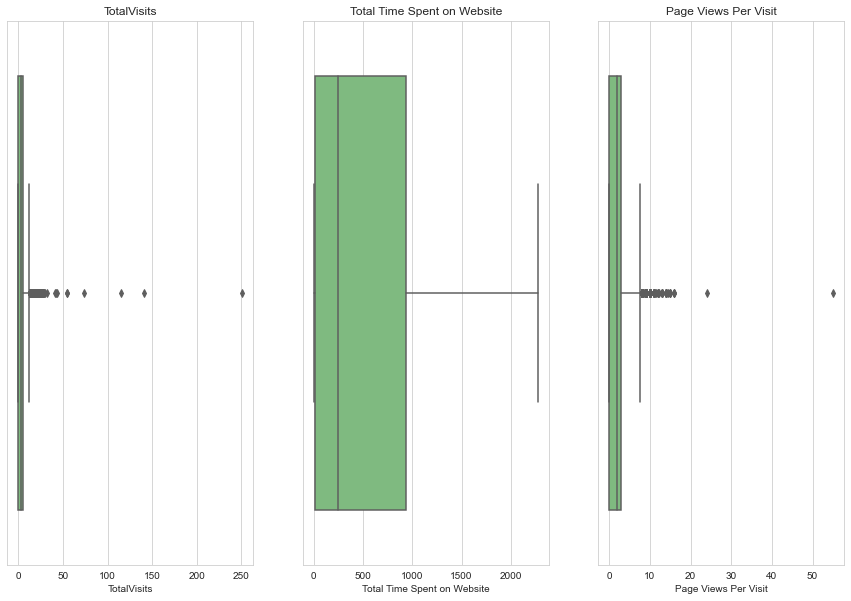

In [43]:
# Let's visualize the outliers

plt.figure(figsize=[15,10])
plt.tight_layout()
sns.set_style('whitegrid')

plt.subplot(1,3,1)
sns.boxplot(data = lead_dr_df, x = 'TotalVisits', palette='Greens_r', orient='v')
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(data = lead_dr_df, x = 'Total Time Spent on Website', palette='Greens_r', orient='v')
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
sns.boxplot(data = lead_dr_df, x = 'Page Views Per Visit', palette='Greens_r', orient='v')
plt.title('Page Views Per Visit')

plt.show()

- From the above boxplots we can observe two have high outlier variables in our dataset __('TotalVisits' and 'Page Views Per Visit')__. 

In [44]:
lead_dr_df['TotalVisits'].describe()

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

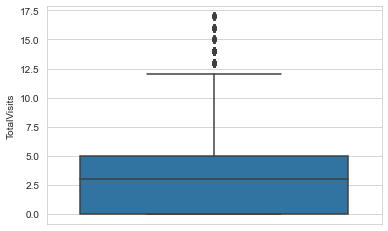

In [45]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead_dr_df.TotalVisits.quantile(0.99)
lead_dr_df = lead_dr_df[(lead_dr_df.TotalVisits <= Q3)]

Q1 = lead_dr_df.TotalVisits.quantile(0.01)
lead_dr_df = lead_dr_df[(lead_dr_df.TotalVisits >= Q1)]

sns.boxplot(y=lead_dr_df['TotalVisits'])
plt.show()

In [46]:
lead_dr_df['Page Views Per Visit'].describe()

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

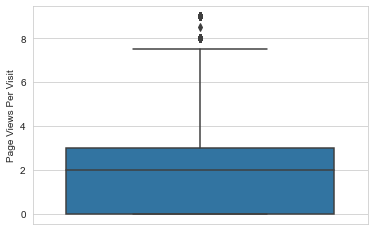

In [47]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_dr_df['Page Views Per Visit'].quantile(0.99)
lead_dr_df = lead_dr_df[lead_dr_df['Page Views Per Visit'] <= Q3]

Q1 = lead_dr_df['Page Views Per Visit'].quantile(0.01)
lead_dr_df = lead_dr_df[lead_dr_df['Page Views Per Visit'] >= Q1]

sns.boxplot(y=lead_dr_df['Page Views Per Visit'])
plt.show()

In [48]:
lead_dr_df['Page Views Per Visit'].describe()

count    9090.000000
mean        2.232693
std         1.901055
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

- The outliers have been removed from the dataset, now our data is clean and free from outliers.

## Data Preparation

### Lets split the data

In [49]:
# Separating the Target Variable

y = lead_dr_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Remaining dataset

X = lead_dr_df.drop('Converted', axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=120)

### Feature Standardization

In [52]:
scaler = MinMaxScaler()

In [53]:
# Scaling the Total Time Spent on Website for the easy analysis and as we saw above in box plot it had a wide range

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

In [54]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3677,0,0,3.0,0.586329,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
707,0,0,3.0,0.029294,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1208,0,0,1.0,0.067909,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2720,0,0,2.0,0.223702,2.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5043,0,0,5.0,0.255659,5.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Lets check the conversion rate of leads from 'Converted' column

round((sum(y)/len(y.index)*100),2)

38.45

- We have a conversion rate of __~38.45 %__.

### Correlation of the dataset

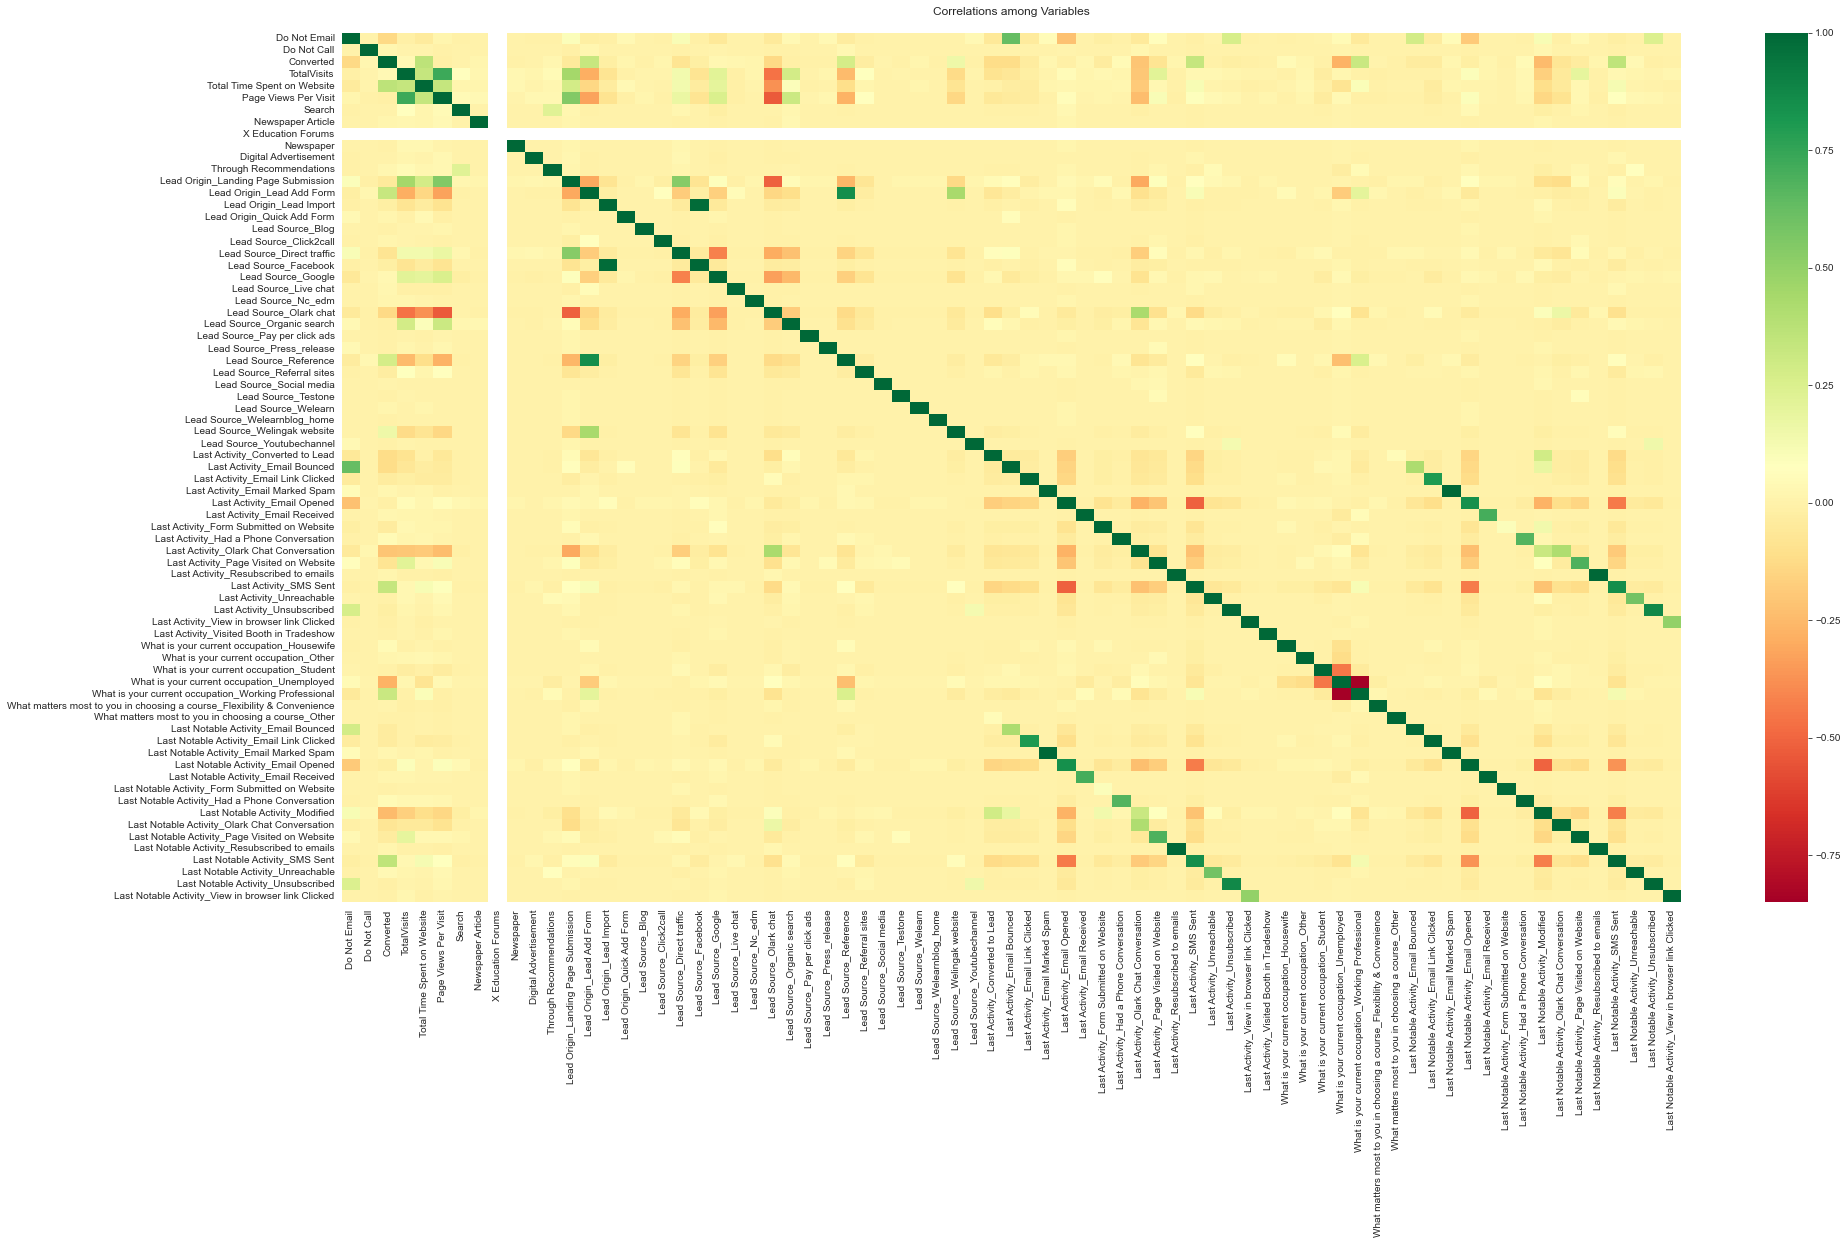

In [56]:
# With the help of Heatmap we can identify the high correlated data.

plt.figure(figsize=[30,16])

sns.heatmap(lead_dr_df.corr(),cmap='RdYlGn')

plt.title('Correlations among Variables\n')

plt.show()

* From the above we see that X Education Forums has no data so lets remove from the dataset.
* Also lets remove the highly correlated variables

In [57]:

high_corr = ['X Education Forums','Lead Source_Olark chat', 'What is your current occupation_Unemployed']

X_train = X_train.drop(high_corr,1)
X_test = X_test.drop(high_corr,1)

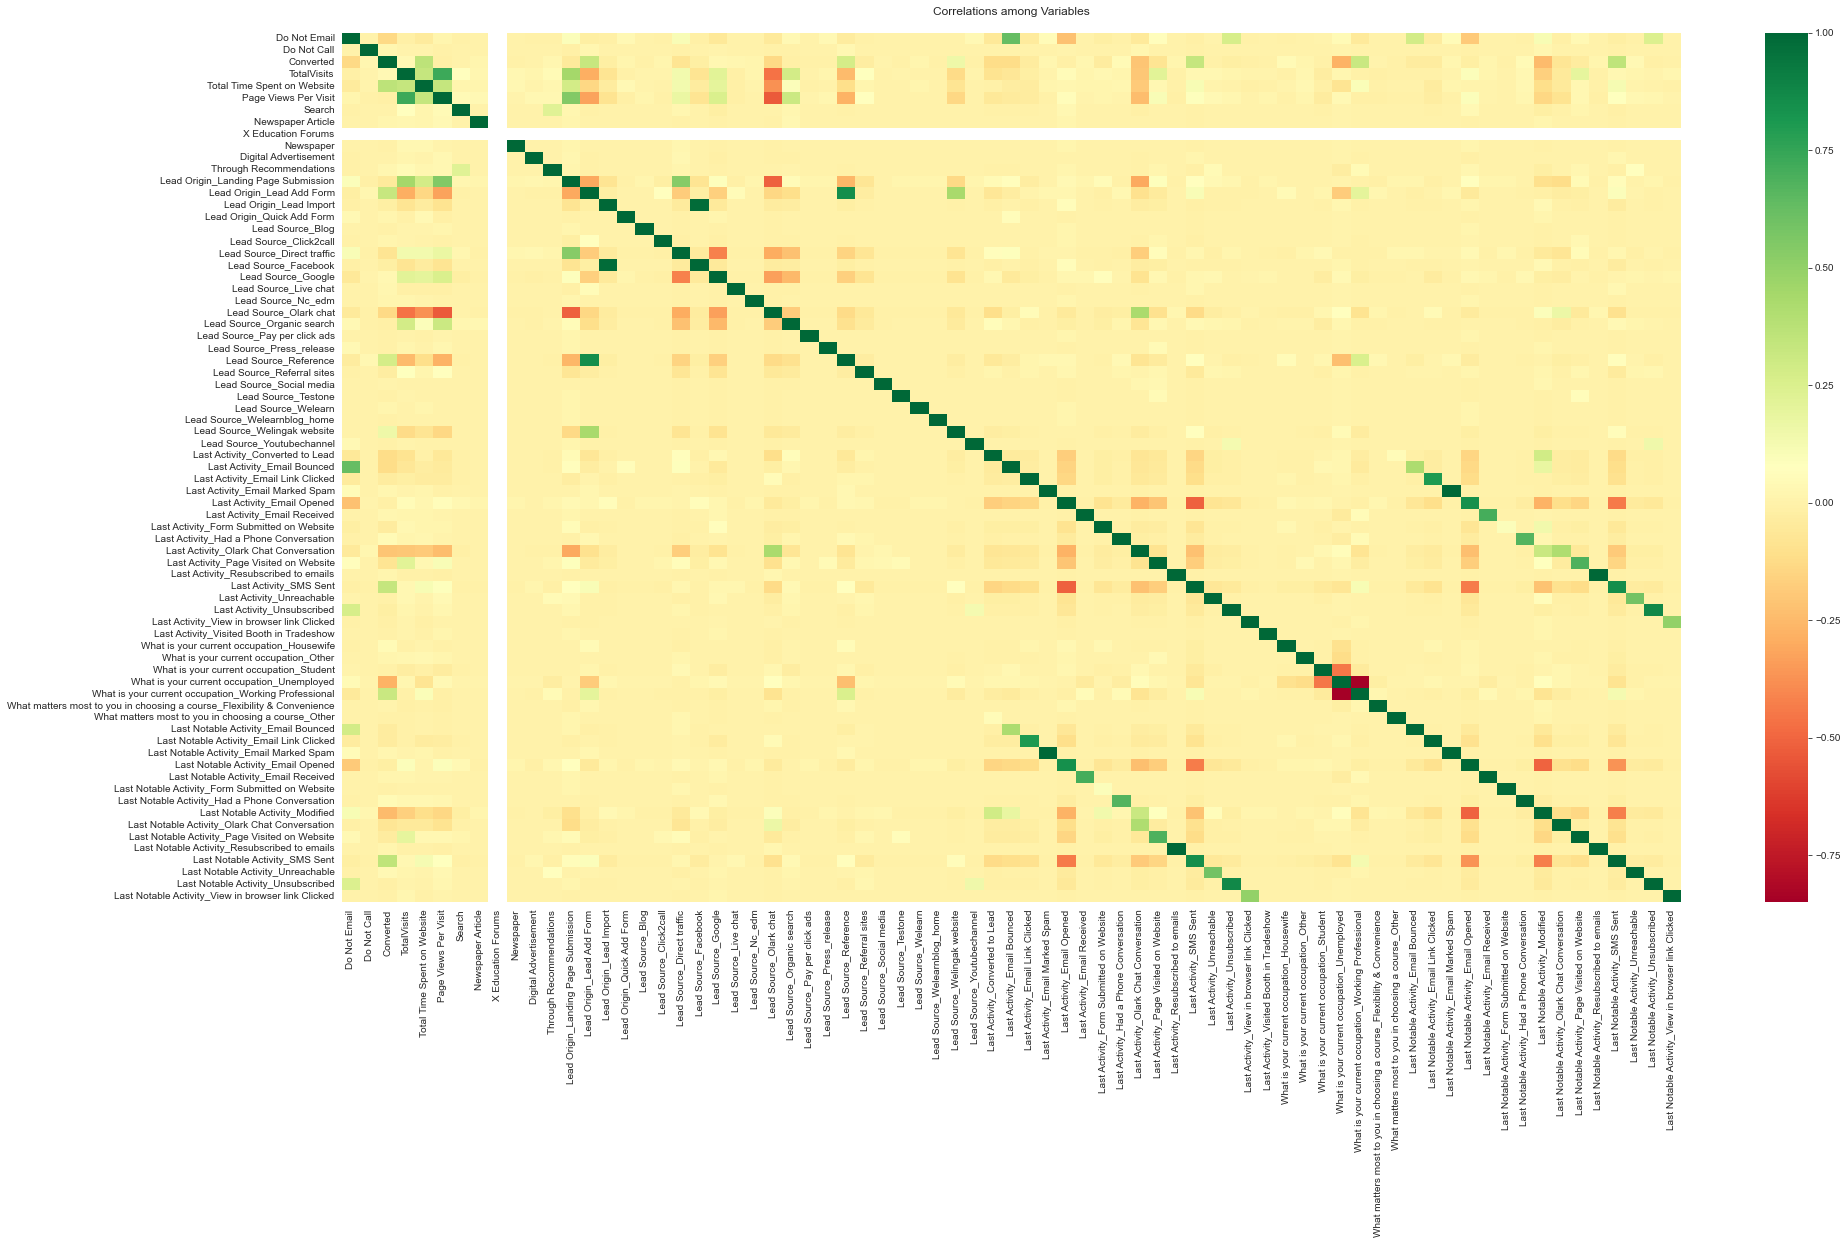

In [58]:
# Checking for the correlation again

plt.figure(figsize=[30,16])

sns.heatmap(lead_dr_df.corr(),cmap='RdYlGn')

plt.title('Correlations among Variables\n')

plt.show()

* Though removed some of the correlated and null columns but it is quiet difficult to spot the high correlation attributes.
* Lets start building the model and with the help of VIFs and p-Value we will find out the relations.

## Building the Model

In [59]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6303
Model Family:                Gaussian   Df Model:                           59
Link Function:               identity   Scale:                         0.13589
Method:                          IRLS   Log-Likelihood:                -2648.6
Date:                Sun, 05 Mar 2023   Deviance:                       856.53
Time:                        22:37:03   Pearson chi2:                     857.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5300
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.6970      0.369      1.888      0.059      -0.027       1.421
Do Not Email                                                               -0.1746      0.024     -7.131      0.000      -0.223      -0.127
Do Not Call                                                                 0.4522      0.261      1.731      0.083      -0.060       0.964
TotalVisits                                                                 0.0159      0.002      6.383      0.000       0.011       0.021
Total Time Spent on Website                                                 0.7591      0.022     35.093      0.000       0.717       0.801
Page Views Per Visit                                                       -0.0186      0.004     -4.414      0.000      -0.027      -0.010
Search                                                                     -0.0798      0.118     -0.674      0.500      -0.312       0.152
Newspaper Article                                                           0.6518      0.370      1.763      0.078      -0.073       1.376
Newspaper                                                                 4.69e-15   3.14e-15      1.492      0.136   -1.47e-15    1.09e-14
Digital Advertisement                                                       0.0306      0.261      0.117      0.907      -0.481       0.543
Through Recommendations                                                     0.1870      0.168      1.115      0.265      -0.142       0.516
Lead Origin_Landing Page Submission                                        -0.0072      0.014     -0.510      0.610      -0.035       0.021
Lead Origin_Lead Add Form                                                   0.5109      0.071      7.150      0.000       0.371       0.651
Lead Origin_Lead Import                                                     0.2152      0.263      0.817      0.414      -0.301       0.731
Lead Origin_Quick Add Form                                              -1.313e-15   2.76e-15     -0.477      0.634   -6.71e-15    4.09e-15
Lead Source_Blog                                                        -1.456e-15   4.39e-15     -0.332      0.740   -1.01e-14    7.15e-15
Lead Source_Click2call                                                     -0.2149      0.199     -1.082      0.279      -0.604       0.174
Lead Source_Direct traffic                                                 -0.1972      0.021     -9.276      0.000      -0.239      -0.156
Lead Source_Facebook                                                       -0.3492      0.264     -1.325      0.185      -0.866       0.167
Lea

- There are many attributes having an insignificant p-values and we will try out the RFE for the feature elimination.

### RFE

In [60]:
# Instantiating LogisticRegression

logreg = LogisticRegression()

In [61]:
# Running rfe with different variable count

# Running with 20 variables

rfem = RFE(logreg, n_features_to_select = 20)
rfem = rfem.fit(X_train, y_train)

In [62]:
# Checking for the true and false for the varibales after rfe

rfem.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False])

In [63]:
# Selecting the 'True' columns in rfem.support_

col = X_train.columns[rfem.support_]

X_train_1 = sm.add_constant(X_train[col]) # Adding constant

In [64]:
# Creating 1st model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.9
Date:                Sun, 05 Mar 2023   Deviance:                       5217.7
Time:                        22:37:07   Pearson chi2:                 6.86e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3743      0.099      3.772      0.000       0.180       0.569
Do Not Email                                            -1.5747      0.197     -8.013      0.000      -1.960      -1.190
Total Time Spent on Website                              4.6220      0.166     27.824      0.000       4.296       4.948
Lead Origin_Lead Add Form                                2.6778      0.202     13.281      0.000       2.283       3.073
Lead Source_Direct traffic                              -1.3331      0.115    -11.558      0.000      -1.559      -1.107
Lead Source_Google                                      -0.9832      0.109     -9.050      0.000      -1.196      -0.770
Lead Source_Organic search                              -1.1466      0.133     -8.609      0.000      -1.408      -0.886
Lead Source_Referral sites                              -1.1118      0.332     -3.345      0.001      -1.763      -0.460
Lead Source_Welingak website                            23.5851    1.9e+04      0.001      0.999   -3.71e+04    3.72e+04
Last Activity_Converted to Lead                         -1.1120      0.222     -5.016      0.000      -1.547      -0.677
Last Activity_Email Bounced                             -1.0159      0.373     -2.725      0.006      -1.747      -0.285
Last Activity_Olark Chat Conversation                   -1.1358      0.188     -6.035      0.000      -1.505      -0.767
Last Activity_View in browser link Clicked             -24.7911   1.02e+05     -0.000      1.000   -1.99e+05    1.99e+05
What is your current occupation_Housewife               25.1343   7.35e+04      0.000      1.000   -1.44e+05    1.44e+05
What is your current occupation_Working Professional     2.6562      0.187     14.179      0.000       2.289       3.023
Last Notable Activity_Email Link Clicked                -1.9392      0.261     -7.444      0.000      -2.450      -1.429
Last Notable Activity_Email Opened                      -1.4648      0.089    -16.425      0.000      -1.640      -1.290
Last Notable Activity_Had a Phone Conversation           1.3620      1.183      1.151      0.250      -0.957       3.681
Last Notable Activity_Modified                          -1.7914      0.102    -17.594      0.000      -1.991      -1.592
Last Notable Activity_Olark Chat Conversation           -2.1411      0.395     -5.423      0.000      -2.915      -1.367
Last Notable Activity_Page Visited on Website           -1.8290      0.209     -8.749      0.000      -2.239      -1.419
========================================================================================================================
"""

### VIF

In [65]:
# Creating VIF Dataframe
vif = pd.DataFrame()

# Adding features
vif['Features'] = X_train_1[col].columns

# Calculating VIF
vif['VIF'] = [variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]

# Rounding the VIF values
vif['VIF']=round(vif['VIF'],2)

# Sorting the VIF values
vif=vif.sort_values(by='VIF',ascending=False)

vif

,Features,VIF
17,Last Notable Activity_Modified,2.52
1,Total Time Spent on Website,2.24
4,Lead Source_Google,2.20
3,Lead Source_Direct traffic,2.12
10,Last Activity_Olark Chat Conversation,1.85
0,Do Not Email,1.84
9,Last Activity_Email Bounced,1.77
15,Last Notable Activity_Email Opened,1.69
2,Lead Origin_Lead Add Form,1.54
5,Lead Source_Organic search,1.47


#### As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.

As expained before we will drop the highest in-significant features i.e 'What is your current occupation_Housewife' having 0.999 p - value.

In [66]:
# Function for building a model

def model_build(X_train, y_train):
    X_train = sm.add_constant(X_train)                          
    logis = sm.GLM(y_train,X_train,families=sm.families.Binomial())  
    reg = logis.fit()  
    return X_train, logis, reg


In [67]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant and running the model

X_train_2 = X_train_1.drop(['const','What is your current occupation_Housewife'],1)

X_train_2, logis2,reg2 = model_build(X_train_2, y_train)                                               
reg2.summary()     


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                         0.13761
Method:                          IRLS   Log-Likelihood:                -2708.7
Date:                Sun, 05 Mar 2023   Deviance:                       872.85
Time:                        22:37:07   Pearson chi2:                     873.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5166
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5171      0.015     34.698      0.000       0.488       0.546
Do Not Email                                            -0.1870      0.023     -8.221      0.000      -0.232      -0.142
Total Time Spent on Website                              0.7684      0.021     35.770      0.000       0.726       0.810
Lead Origin_Lead Add Form                                0.3853      0.022     17.275      0.000       0.342       0.429
Lead Source_Direct traffic                              -0.1879      0.016    -11.993      0.000      -0.219      -0.157
Lead Source_Google                                      -0.1308      0.015     -8.711      0.000      -0.160      -0.101
Lead Source_Organic search                              -0.1588      0.018     -8.658      0.000      -0.195      -0.123
Lead Source_Referral sites                              -0.1726      0.044     -3.953      0.000      -0.258      -0.087
Lead Source_Welingak website                             0.2228      0.041      5.475      0.000       0.143       0.303
Last Activity_Converted to Lead                         -0.1229      0.024     -5.181      0.000      -0.169      -0.076
Last Activity_Email Bounced                             -0.0404      0.033     -1.228      0.220      -0.105       0.024
Last Activity_Olark Chat Conversation                   -0.1419      0.020     -6.963      0.000      -0.182      -0.102
Last Activity_View in browser link Clicked              -0.2921      0.186     -1.572      0.116      -0.656       0.072
What is your current occupation_Working Professional     0.3215      0.018     17.559      0.000       0.286       0.357
Last Notable Activity_Email Link Clicked                -0.3186      0.035     -9.109      0.000      -0.387      -0.250
Last Notable Activity_Email Opened                      -0.2424      0.013    -18.870      0.000      -0.268      -0.217
Last Notable Activity_Had a Phone Conversation           0.1169      0.132      0.888      0.374      -0.141       0.375
Last Notable Activity_Modified                          -0.2932      0.014    -21.387      0.000      -0.320      -0.266
Last Notable Activity_Olark Chat Conversation           -0.3172      0.038     -8.281      0.000      -0.392      -0.242
Last Notable Activity_Page Visited on Website           -0.3049      0.028    -11.085      0.000      -0.359      -0.251
========================================================================================================================
"""

In [68]:
# Dropping 'Last Activity_Email Bounced' and recreating the result

X_train_3 = X_train_2.drop(['const','Last Activity_Email Bounced'],1)
X_train_3, logis3,reg3 = model_build(X_train_3, y_train)                                               
reg3.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.13762
Method:                          IRLS   Log-Likelihood:                -2709.4
Date:                Sun, 05 Mar 2023   Deviance:                       873.06
Time:                        22:37:07   Pearson chi2:                     873.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5165
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5175      0.015     34.742      0.000       0.488       0.547
Do Not Email                                            -0.2037      0.018    -11.194      0.000      -0.239      -0.168
Total Time Spent on Website                              0.7684      0.021     35.769      0.000       0.726       0.810
Lead Origin_Lead Add Form                                0.3863      0.022     17.328      0.000       0.343       0.430
Lead Source_Direct traffic                              -0.1877      0.016    -11.982      0.000      -0.218      -0.157
Lead Source_Google                                      -0.1303      0.015     -8.680      0.000      -0.160      -0.101
Lead Source_Organic search                              -0.1583      0.018     -8.633      0.000      -0.194      -0.122
Lead Source_Referral sites                              -0.1728      0.044     -3.957      0.000      -0.258      -0.087
Lead Source_Welingak website                             0.2229      0.041      5.477      0.000       0.143       0.303
Last Activity_Converted to Lead                         -0.1206      0.024     -5.102      0.000      -0.167      -0.074
Last Activity_Olark Chat Conversation                   -0.1390      0.020     -6.867      0.000      -0.179      -0.099
Last Activity_View in browser link Clicked              -0.2906      0.186     -1.564      0.118      -0.655       0.073
What is your current occupation_Working Professional     0.3216      0.018     17.562      0.000       0.286       0.357
Last Notable Activity_Email Link Clicked                -0.3193      0.035     -9.131      0.000      -0.388      -0.251
Last Notable Activity_Email Opened                      -0.2432      0.013    -18.956      0.000      -0.268      -0.218
Last Notable Activity_Had a Phone Conversation           0.1160      0.132      0.882      0.378      -0.142       0.374
Last Notable Activity_Modified                          -0.2962      0.013    -21.958      0.000      -0.323      -0.270
Last Notable Activity_Olark Chat Conversation           -0.3196      0.038     -8.355      0.000      -0.395      -0.245
Last Notable Activity_Page Visited on Website           -0.3036      0.027    -11.045      0.000      -0.357      -0.250
========================================================================================================================
"""

- Now, from the above summary as we can say that all the variables present in this model are **significant** as no variables is having p - value greater than 5%.

In [69]:
# Re-Checking the VIFs for the confirmation

# Checking VIF again just to be sure

X_train_3_1 = X_train_3.drop('const',1)
vif=pd.DataFrame()                        
vif['Features']=X_train_3_1.columns       

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_3_1.values,i) for i in range(X_train_3_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
15,Last Notable Activity_Modified,2.44
1,Total Time Spent on Website,2.24
4,Lead Source_Google,2.20
3,Lead Source_Direct traffic,2.11
9,Last Activity_Olark Chat Conversation,1.81
13,Last Notable Activity_Email Opened,1.69
2,Lead Origin_Lead Add Form,1.54
5,Lead Source_Organic search,1.47
16,Last Notable Activity_Olark Chat Conversation,1.40
7,Lead Source_Welingak website,1.30


- As there are no multicollinearity issues as all the values are below 5.00 and hence we can proceed to __Predict__ the model.
- Our final model is __X_train_3 & reg3__ and we are predicting our dataset based on this.

## Predicting the train model

In [70]:
# Predicting the train dataset

y_train_pred = reg3.predict(X_train_3)

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_probability': y_train_pred, 'ID': y_train.index})

y_train_pred_final.head()

,Converted,Converted_probability,ID
3677,1,0.594524,3677
707,0,0.113539,707
1208,0,-0.005419,1208
2720,0,0.258479,2720
5043,1,0.662006,5043


### ROC Curve Plotting

- ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases specificity will decrease.
- The curve closer to the left side border then right side of the border is more accurate.
- The curve closer to the 45-degree diagonal of the ROC space is less accurate.

In [71]:
# Importing libraries for roc_curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [72]:
# Creating a function to plot roc curve

def lead_roc(real, probability):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(real, probability, drop_intermediate=True)
    
    # Calculating the auc score(area under the curve)
    auc_score = roc_auc_score(real, probability)
    
    # Setting the figure
    plt.figure(figsize=[8,4])
    
    # Plotting the roc_curve
    plt.plot(fpr,tpr,label='ROC Curve (area= %0.2f)' %auc_score)
    
    # Plotting the 45% dotted line
    plt.plot([0,1], [0,1], 'r--')
             
    # Setting the x-axis limit
    plt.xlim([0.0, 1.0])
             
    # Setting the y-axis limit
    plt.ylim([0.0, 1.05])
             
    # Setting the x-axis label
    plt.xlabel('False Positive Rate')
             
    # Setting the y-axis label
    plt.ylabel('True Positive Rate')
             
    # Setting the title
    plt.title('Receiver Operating Characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    plt.legend(loc="lower right")
    
    # Showing the plot
    plt.show()

    # no return         
    return None             

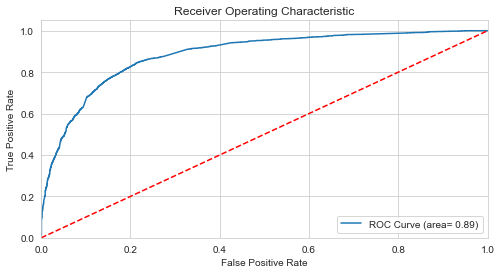

In [73]:
# Calling the roc curve for plotting

lead_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be noted from the ROC Curve
- The curve is closer to the left border than to the right border hence our model is having great accuracy.
- The curve area is 88% of the total area.

### Finding the Optimal Cutoff Point

In [74]:
# 10 points are being created out of which we will only one point for cutoff point.

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_probability.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3677,1,0.594524,3677,1,1,1,1,1,1,0,0,0,0
707,0,0.113539,707,1,1,0,0,0,0,0,0,0,0
1208,0,-0.005419,1208,0,0,0,0,0,0,0,0,0,0
2720,0,0.258479,2720,1,1,1,0,0,0,0,0,0,0
5043,1,0.662006,5043,1,1,1,1,1,1,1,0,0,0


Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding '__Accuracy__', '__Sensitivity__' and '__Specificity__' for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [75]:
# Importing necessary library

from sklearn.metrics import confusion_matrix

In [76]:
# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier

print(df_cutoffs)   

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.442401    0.996751     0.092540
0.1          0.1  0.564828    0.981316     0.301974
0.2          0.2  0.694798    0.949228     0.534222
0.3          0.3  0.790979    0.867994     0.742374
0.4          0.4  0.812824    0.806255     0.816970
0.5          0.5  0.813138    0.691714     0.889772
0.6          0.6  0.784536    0.534525     0.942322
0.7          0.7  0.747289    0.397644     0.967957
0.8          0.8  0.717272    0.295695     0.983338
0.9          0.9  0.685840    0.201056     0.991797


As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9. Out of this we have to choose one as a cutoff point and it is __probability cutoff = 0.4__ because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

Lets plot this data and see the convergence point for the 'accuracy', 'sensitivity' and 'specificity'.

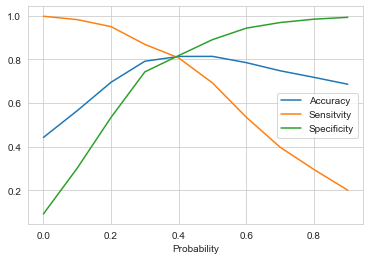

In [77]:
# Plotting 'Accuracy', 'Sensitivity' and 'Specificity' for various possibilities from 0 to 0.9

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()

- From the above graph it is prominent that __0.4__ is perfect for the probability cutoff.

In [78]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

# Predicted value
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0)  
 
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
3677,1,0.594524,3677,1,1,1,1,1,1,0,0,0,0,1
707,0,0.113539,707,1,1,0,0,0,0,0,0,0,0,0
1208,0,-0.005419,1208,0,0,0,0,0,0,0,0,0,0,0
2720,0,0.258479,2720,1,1,1,0,0,0,0,0,0,0,0
5043,1,0.662006,5043,1,1,1,1,1,1,1,0,0,0,1


### Precision and Recall

In [79]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3187,  714],
       [ 477, 1985]])

In [80]:
print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    # Printing Pecision score
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       # Printing Recall score

Precision 0.7354575768803261
Recall 0.80625507717303


Important points to be noted from the outcomes for precision and recall score -

- Our precison percentage is __~73%__ approximately and recall percentage is __80%__.


#### Precision and Recall Trade-Off

In [81]:
# Importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

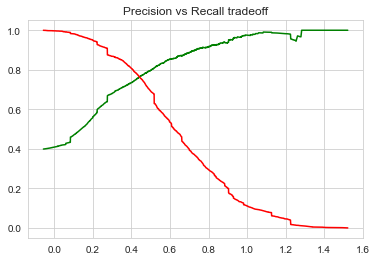

In [82]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

## Prediction on the test dataset

### Scaling the dataset

In [83]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

### Predicting

In [84]:
# Predicting the test dataset with our final model

test_cols = X_train_3.columns[1:]              # Taking the same column train set has
X_test_final = X_test[test_cols]               # Updating it in the final test set
X_test_final = sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test = reg3.predict(X_test_final)       # Predicting the final test set

In [85]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final = pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()

,Converted,Converted_Probability,ID
6764,0,0.082356,6764
7812,1,0.333848,7812
8275,0,0.047597,8275
6716,0,-0.055853,6716
6809,0,-0.093954,6809


### Model Evaluation

In [86]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

# Predicted value
y_test_pred_final['Predicted'] = y_test_pred_final['Converted_Probability'].map(lambda x:1 if x>0.4 else 0 ) 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
6764,0,0.082356,6764,0
7812,1,0.333848,7812,0
8275,0,0.047597,8275,0
6716,0,-0.055853,6716,0
6809,0,-0.093954,6809,0


In [87]:
# Importing the metrics library

from sklearn import metrics

In [88]:
# Checking the accuracy of the test dataset.

print('Accuracy score in predicting test dataset :', metrics.accuracy_score(y_test_pred_final.Converted, 
                                                                           y_test_pred_final.Predicted))

Accuracy score in predicting test dataset : 0.8008800880088008


In [89]:
# Importing the Precision and Recall metrics

from sklearn.metrics import precision_score, recall_score

In [90]:
# Checking the Precision and Recall score

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, 
                                                                    y_test_pred_final.Predicted))

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, 
                                                              y_test_pred_final.Predicted))

Precision score in predicting test dataset: 0.7145359019264448
Recall score in predicting test dataset: 0.7899322362052275


## Lead Score Assigning

In [91]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number'] = lead_df.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score'] = y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
6764,0,0.082356,6764,0,597956,8
7812,1,0.333848,7812,0,589874,33
8275,0,0.047597,8275,0,586680,5
6716,0,-0.055853,6716,0,598294,-6
6809,0,-0.093954,6809,0,597540,-9


## Conclusion

- The Accuracy, Precision and Recall score we got from the test data are in the acceptable region.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are:
    - __Last Notable Activity_Modified__
    - __Total Time Spent on Website__
    - __Lead Source_Google__.